<a href="https://colab.research.google.com/github/CaptainTyborg/WEEK-2-Assignment-for-Specialisation/blob/main/notebooks_carbon_forecast_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


MAE: 10.98
RMSE: 56.85
R² Score: 0.999


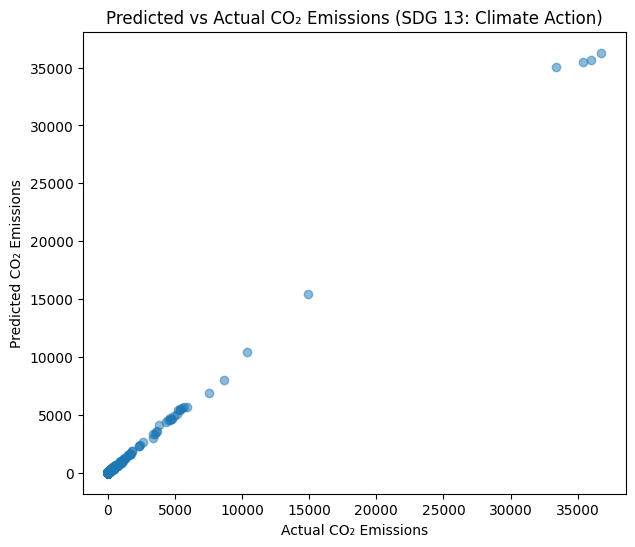

In [ ]:
# --- Step 1: Import libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import joblib # Import joblib here

# --- Step 2: Load dataset ---
df = pd.read_csv('/content/owid-co2-data.csv')

# --- Step 3: Select useful columns ---
cols = ['country', 'year', 'gdp', 'energy_per_capita',
        'population', 'primary_energy_consumption', 'co2']

df_small = df[cols].dropna()  # remove rows with missing values

# --- Step 4: Define features and target ---
X = df_small[['gdp', 'energy_per_capita', 'population', 'primary_energy_consumption']]
y = df_small['co2']

# --- Step 5: Split the dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 6: Train a Random Forest model ---
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# --- Step 7: Make predictions ---
y_pred = model.predict(X_test)

# --- Step 8: Evaluate performance ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

# --- Step 9: Visualize predictions ---
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CO² Emissions")
plt.ylabel("Predicted CO² Emissions")
plt.title("Predicted vs Actual CO² Emissions (SDG 13: Climate Action)")
plt.show()

# --- Step 10: Save cleaned data and model ---
df_small.to_csv('cleaned_co2_data.csv', index=False)
joblib.dump(model, 'rf_co2_model.pkl')